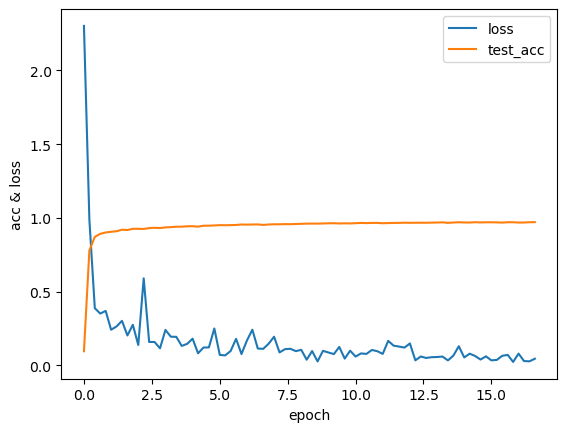

最终正确率: 0.9708


In [1]:
import mnist
import TwoLayerNet as net
import numpy as np
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = mnist.load_mnist(
    normalize=True, one_hot_label=True
)
network = net.TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []
loss_list = []
x = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_maks = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_maks]
    t_batch = t_train[batch_maks]

    grad = network.gradient(x_batch,t_batch)

    # 更新
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]

    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % (iter_per_epoch/5) == 0:
        epoch = float(i)/iter_per_epoch
        x.append(epoch)
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        loss_list.append(loss)

plt.plot(x,loss_list,label="loss")
plt.plot(x,test_acc_list,label="test_acc")
plt.xlabel("epoch")
plt.ylabel("acc & loss")
plt.legend()
plt.show()

print("最终正确率:",float(test_acc_list[-1]))